# Rara Yetrisia Putri
## 1911012024


# **Structured Query Language**

**SQL** adalah singkatan dari **Structured Query Language**. Ini adalah bahasa pilihan di web saat ini untuk menyimpan, memanipulasi dan mengambil data dalam Sistem Manajemen Basis Data Relasional (RDBMS). Bahasa seperti SQL juga dapat digunakan dalam Aliran **Data Relasional Sistem Manajemen (RDSMS)**, atau dalam database **"tidak hanya SQL" (NoSQL)**.

SQL terdiri dari 2 sub-bahasa utama:​

1. **Data Definition Language (DDL)**: untuk membuat dan memodifikasi struktur database;​
2. **Data Manipulation Language (DML)**: untuk melakukan operasi Baca, Sisipkan, Perbarui, dan Hapus pada data;

Dalam SQL memiliki delapan tipe data yang paling sering digunakan:​

1. **Integer.** Bilangan bulat tanpa bagian pecahan. Misalnya. 1, 156, 2012412​.

2. **Decimal.** Bilangan dengan bagian pecahan. Misalnya. 3.14, 3.141592654, 961.1241250​.

3. **Boolean.** Sebuah nilai biner. Ini bisa berupa TRUE atau FALSE.​

4. **Date.** Digunakan untuk menyimpan data tanggal. Misalnya. 2017-12-31​.

5. **Time.** Digunakan untuk menyimpan data waktu. Misalnya. 23:59:59​.

6. **Timestamp.** Tanggal dan waktu bersama. Misalnya. 31-12-2017 23:59:59​.

7. **Float.** Digunakan untuk menyimpan data bilangan pecahan positif dan negatif presisi tunggal. Misalnya. -3.402823466E+38 sampai 3.402823466E+38​.

8. **String.** Ini adalah tipe data yang paling umum. Tapi itu hanya bisa huruf abjad,​ atau campuran huruf dan angka dan karakter lainnya. Misalnya. halo, R2D2,​ Tomi, 124.56.128.41.

# **Koneksi Ke Database**

Kita akan mulai menghubungkan ke database:

Sebelum kita mulai jangan lupa untuk mengupload file database ke google colab. File database yang digunakan adalah sqlite-sakila.db

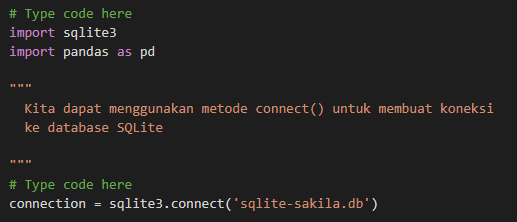

In [1]:
# Type code here
import sqlite3
import pandas as pd


""" 
  Kita dapat menggunakan metode connect() untuk membuat koneksi 
  ke database SQLite 

"""
# Type code here
connection = sqlite3.connect('sqlite-sakila.db')



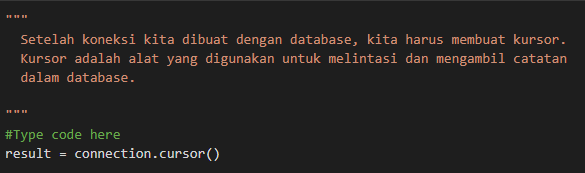

In [ ]:
"""
  Setelah koneksi kita dibuat dengan database, kita harus membuat kursor. 
  Kursor adalah alat yang digunakan untuk melintasi dan mengambil catatan 
  dalam database.
  
"""
#Type code here
result = connection.cursor()

Kursor memiliki peran utama karena kita akan menggunakannya setiap kali kita akan menjalankan kueri SQL dari Python.

Metode kursor untuk menjalankan kueri SQL meliputi:
<ul>
  <li><b>execute():</b> mengeksekusi satu pernyataan SQL,</li>
  <li><b>executemany():</b> mengeksekusi perintah SQL berparameter dengan beberapa   urutan parameter,</li>
  <li><b>executescript():</b> mengeksekusi beberapa pernyataan SQL sekaligus.</li>
</ul>

**PENTING:** 
<br>
<p align="justify">
Pernyataan SQL yang mengubah database (CREATE, DROP, INSERT, UPDATE, DELETE, dll.) tidak langsung berlaku, kita harus melakukan perubahan setelah setiap pernyataan.Jika database diakses oleh beberapa koneksi yang memodifikasinya, SQLite akan mengunci database sampai perubahan tersebut dilakukan. Jadi, jangan pernah lupa untuk melakukan perubahan Anda setelah setiap pernyataan SQL Anda.
</p>

Untuk melakukan transaksi, cukup jalankan metode commit():

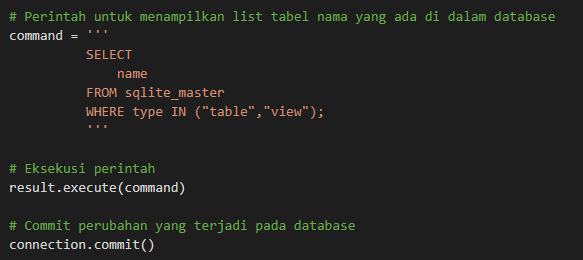

In [ ]:
# Perintah untuk menampilkan list tabel nama yang ada di dalam database
command = '''
          SELECT
              name
          FROM sqlite_master
          WHERE type IN ("table", "view")
          '''

# Eksekusi perintah
result.execute(command)

# Commit perubahan yang terjadi pada database
connection.commit()

Untuk mengambil baris dengan database SQLite menggunakan Python, kita dapat:

<ul>
<li>Perlakukan kursor sebagai iterator,</li>
<li><b>Panggil metode fetchone()</b>, dimana kursor mengambil baris berikutnya dari kumpulan hasil kueri, mengembalikan satu urutan.</li>
<li><b>Panggil metode fetchall()</b>, dimana kursor mengambil baris berikutnya dari kumpulan hasil kueri. Jumlah baris berikutnya yang akan diambil harus ditentukan sebagai parameter metode. Baris yang diambil dikembalikan dalam daftar Python dengan tupel.</li>
<li><b>Panggil metode fetchmany()</b>, dimana kursor mengambil semua baris dari kumpulan hasil kueri. Baris yang diambil dikembalikan dalam daftar Python dengan tupel.</li>
</ul>


In [ ]:
# Menampilkan hasil list tabel nama yang ada di dalam database dalam bentuk dataframe
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

# **ERD DATABASE**

Database yang kita gunakan pada latihan hari ini adalah [SQLite Sakila Sample Dataset ](https://www.kaggle.com/datasets/atanaskanev/sqlite-sakila-sample-database). Dimana basis data sampel Sakila adalah basis data fiktif yang dirancang untuk mewakili toko persewaan DVD. Tabel database termasuk film, film_category, aktor, pelanggan, sewa, pembayaran dan persediaan antara lain. Basis data sampel Sakila dimaksudkan untuk memberikan skema standar yang dapat digunakan untuk contoh dalam buku, tutorial, artikel, sampel, dan lain sebagainya.


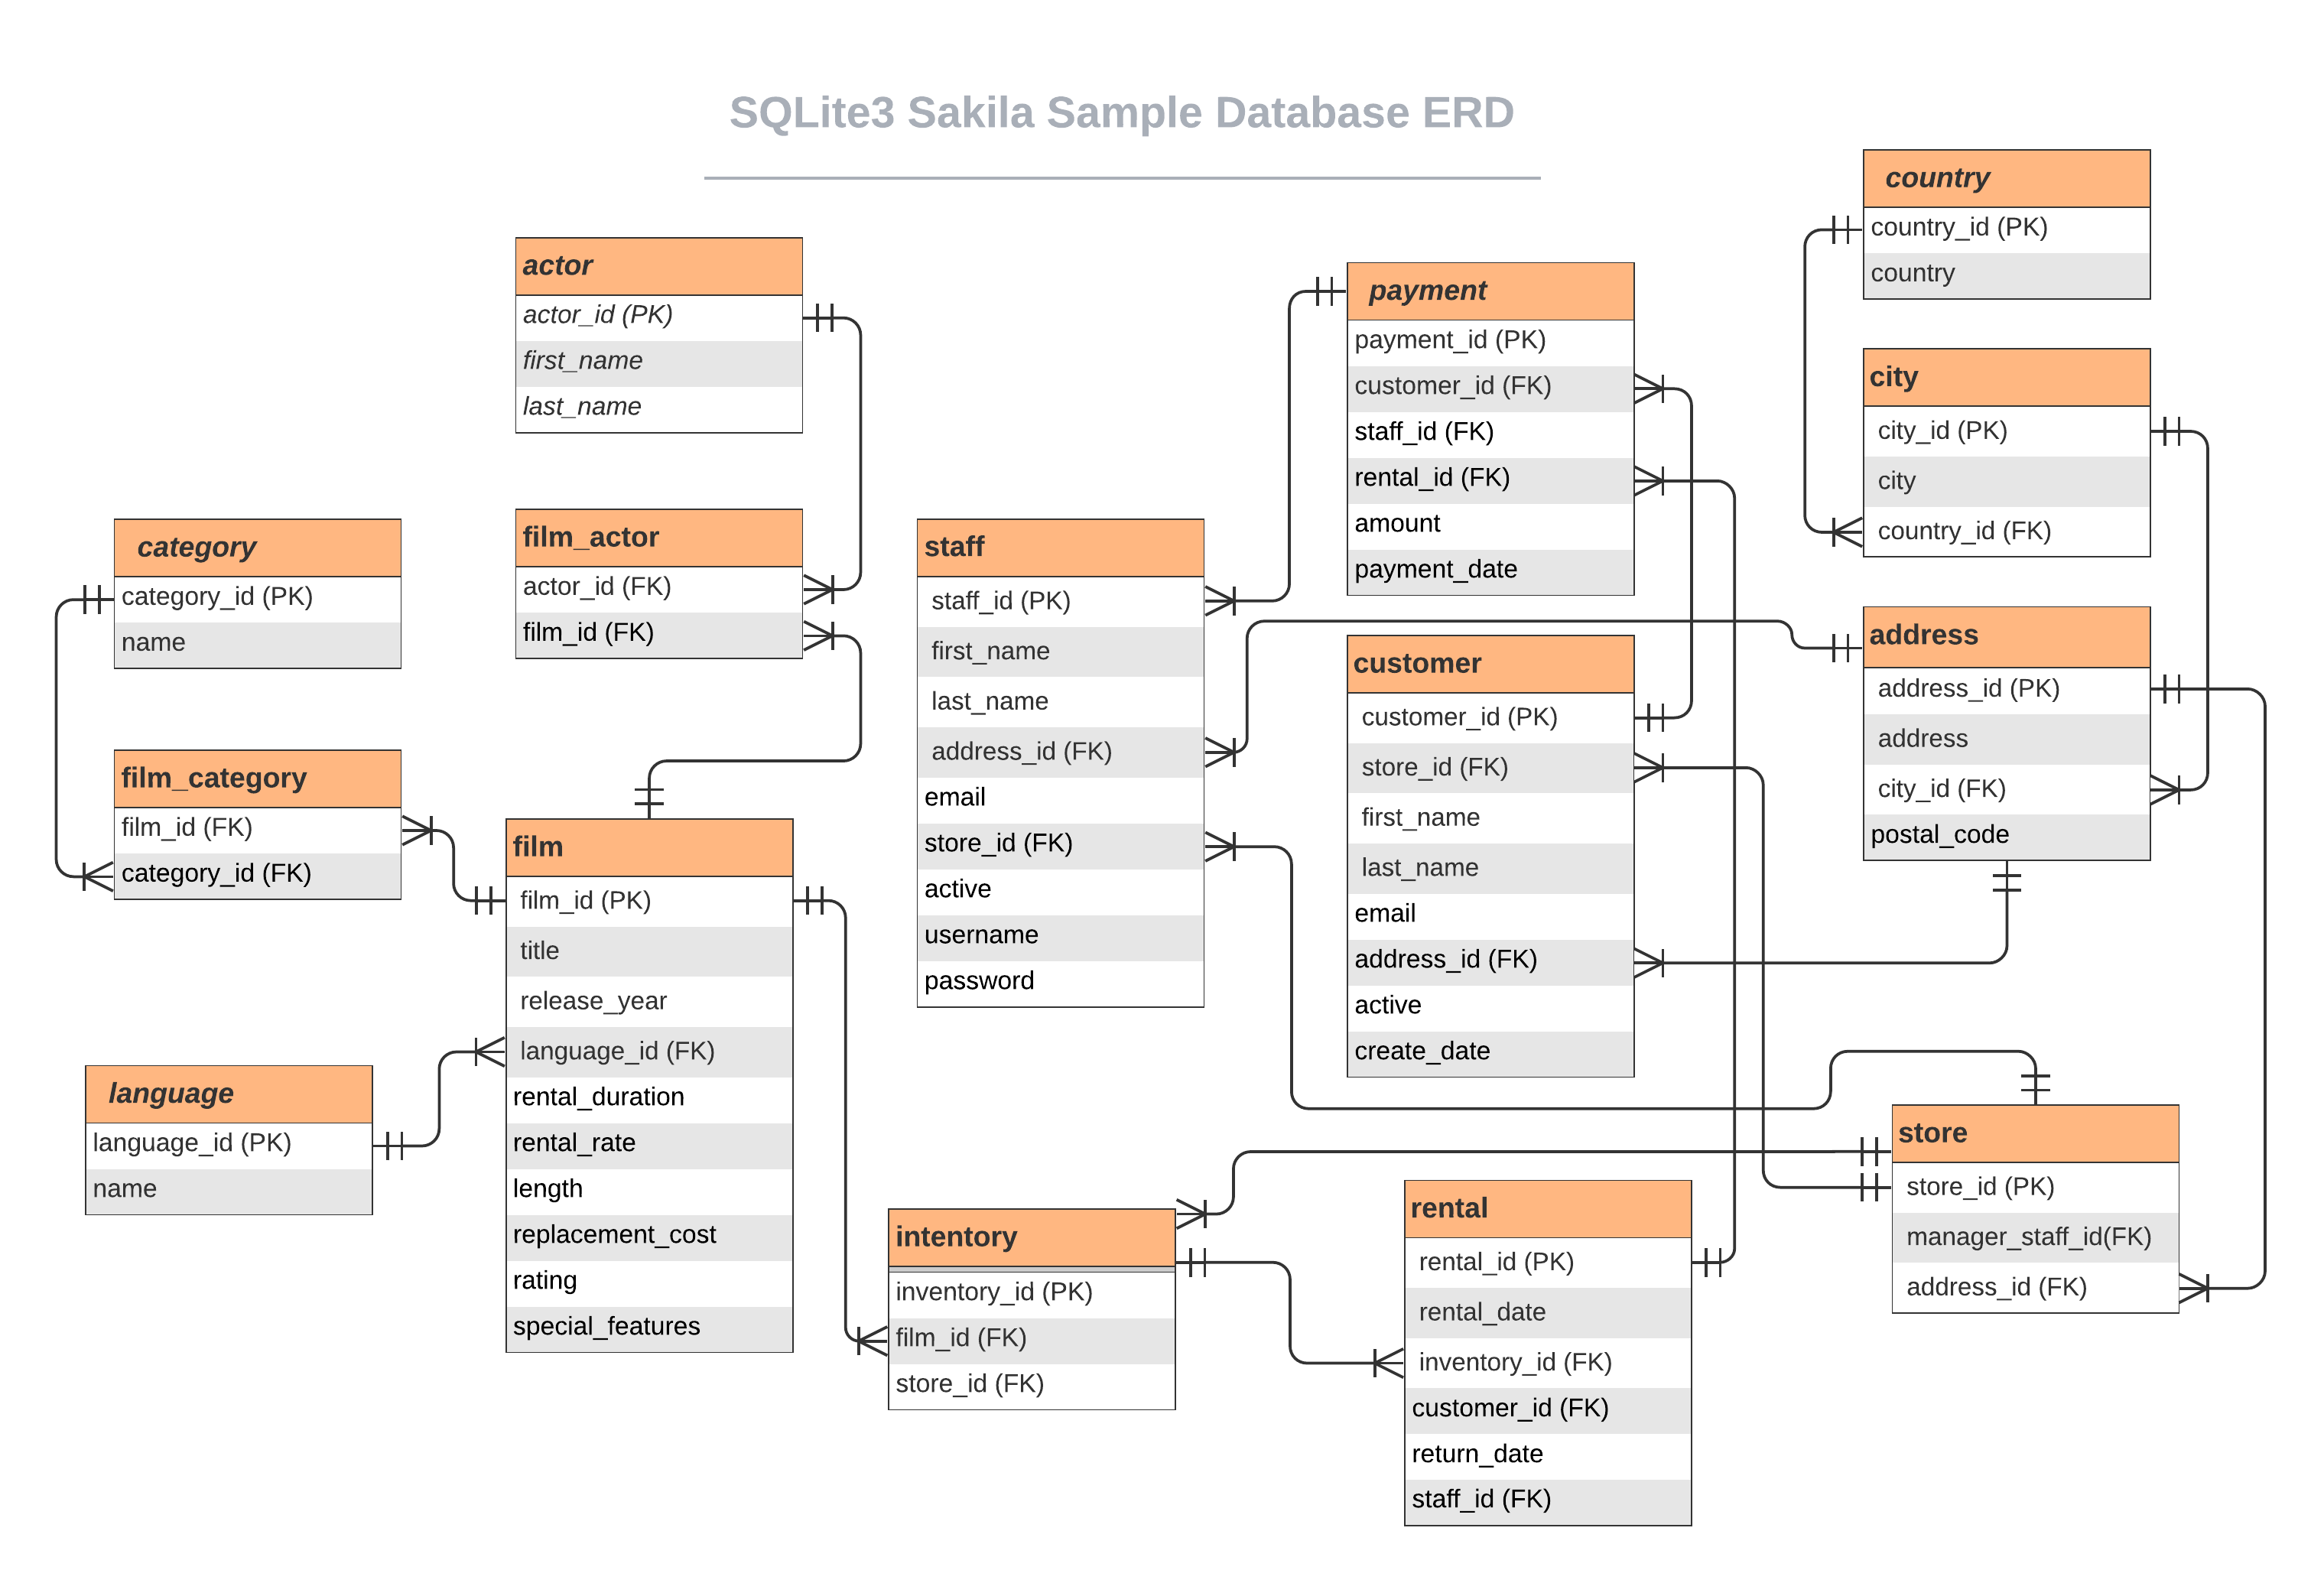

Ada beberapa jenis relasi pada database:
1.   **One to One** 
<br>
Satu ke Satu (One to One), yang berarti satu entitas A berhubungan paling banyak satu dengan entitas B. Begitupun sebaliknya, satu entitas pada
himpunan B berhubungan paling banyak satu dengan entitas A.


2.   **One to Many**  
Satu ke Banyak (One to Many), yang berarti satu entitas A dapat berhubungan lebih dari satu dengan entitas B. Namun tidak berlaku sebaliknya,
dimana setiap entitas pada himpunan entitas B berhubungan dengan paling
banyak dengan satu entitas pada himpunan entitas A.


3.   **Many to One** 
Banyak ke Satu (Many to One), yang berarti satu entitas A berhubungan paling banyak dengan satu entitas B. Namun tidak berlaku sebaliknya, dimana
setiap entitas pada himpunan entitas B dapat berhubungan lebih dari satu
dengan entitas A. 


4.   **Many to Many** 
Banyak ke Banyak (Many to Many), yang berarti satu entitas A dapat berhubungan lebih dari satu dengan entitas B dan sebaliknya. 

Open diskusi dengan student kira-kira, tabel mana saja dari database diatas yang masuk kategori one to one, one to many, many to one, maupun many to many. 

# **RELATIONSHIP OPERATION**

Contoh Query membuat tabel relasi ONE TO ONE:
1. Tabel Customer:
```python
CREATE TABLE customer (
      customer_id SMALLINT NOT NULL PRIMARY KEY,
      store_id TINYINT NOT NULL,
      first_name VARCHAR(45) NOT NULL,
      last_name VARCHAR(45) NOT NULL,
      email VARCHAR(50) NOT NULL,
      address_id SMALLINT NOT NULL,
      active TINYINT NOT NULL,
      create_date DATETIME NOT NULL
      FOREIGN KEY (store_id) REFERENCES store(store_id) 
      FOREIGN KEY (address_id) REFERENCES editors(address_id) 
);
```
2. Tabel Address:
```python
CREATE TABLE address (
      address_id SMALLINT NOT NULL PRIMARY KEY,
      address VARCHAR(30) NOT NULL,
      city_id SMALLINT NOT NULL,
      postal_code INT NOT NULL,
      FOREIGN KEY (city_id) REFERENCES city(city_id) 
);
```

Contoh Query membuat tabel relasi MANY TO MANY:
1. Tabel Film:
```python
CREATE TABLE film (
      film_id SMALLINT NOT NULL PRIMARY KEY,
      title 
      release_year 
      language_id 
      rental_duration 
      rental_rate 
      length 
      replacement_cost 
      rating
      special_features
      FOREIGN KEY (language_id) REFERENCES language(language_id) 
);
```
2. Tabel Category:
```python
CREATE TABLE category (
      category_id SMALLINT NOT NULL PRIMARY KEY,
      name VARCHAR(25) NOT NULL,
);
```

3. Tabel Film Category:
```python
CREATE TABLE film_category (
      category_id SMALLINT NOT NULL,
      film_id SMALLINT NOT NULL,
      FOREIGN KEY (category_id) REFERENCES category(category_id) 
      FOREIGN KEY (film_id) REFERENCES film(film_id) 
);
```

# **RELATIONSHIP OPERATION - ONE TO MANY**

Sekarang kita belajar membuat tabel baru dengan menerapkan relasi ONE TO MANY. 
<br>
1. Mari kita buat 2 buah tabel tambahan ke dalam database yaitu tabel buku dan tabel authors, dimana relasi yang didapatkan adalah 1 author, bisa mempunyai banyak buku.
2. Mari kita buat 1 buah tabel tambahan yaitu tabel order books yang akan berelasi dengan tabel customer yang sudah tersedia di dalam database, dimana relasi yang didapatkan adalah 1 customer, bisa mempunyai banyak pesanan.


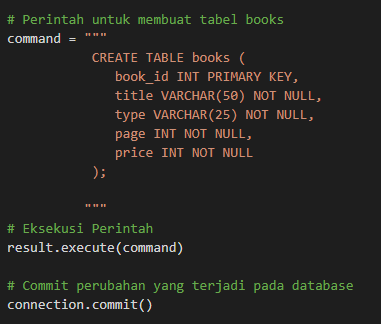

In [ ]:
# Perintah untuk membuat tabel books
command = """
          CREATE TABLE books (
            book_id INT PRIMARY KEY,
            title VARCHAR(50) NOT NULL,
            type VARCHAR(25) NOT NULL,
            page INT NOT NULL,
            price INT NOT NULL
          );

          """
# Eksekusi Perintah
result.execute(command)

# Commit perubahan yang terjadi pada database
connection.commit()

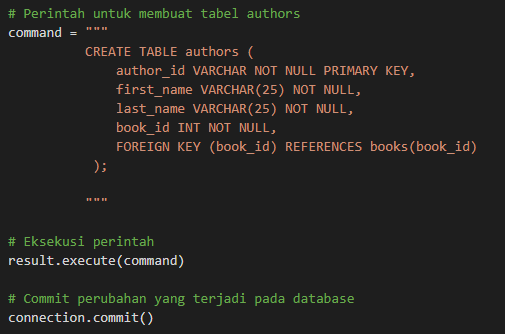

In [ ]:
# Perintah untuk membuat tabel authors
command = """
          CREATE TABLE authors (
            author_id VARCHAR NOT NULL PRIMARY KEY,
            first_name VARCHAR(25) NOT NULL, 
            last_name VARCHAR(25) NOT NULL,
            book_id INT NOT NULL,
            FOREIGN KEY (book_id) REFERENCES books(book_id)
          );


          """

# Eksekusi perintah
result.execute(command)

# Commit perubahan yang terjadi pada database
connection.commit()

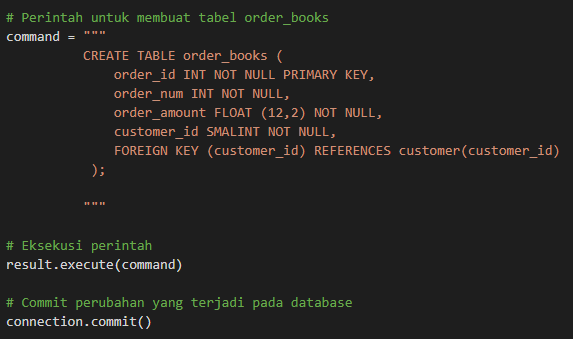

In [ ]:
# Perintah untuk membuat tabel order_books
command = """
          CREATE TABLE order_books (
            order_id INT NOT NULL PRIMARY KEY,
            order_num INT NOT NULL,
            order_amount FLOAT(12,2) NOT NULL,
            customer_id SMALINT NOT NULL,
            FOREIGN KEY (customer_id) REFERENCES cusstomer(customer_id)
          );



          """

# Eksekusi perintah
result.execute(command)

# Commit perubahan yang terjadi pada database
connection.commit()

Nah sekarang, kita masukkan data ke dalam tabel books, tabel authors, dan tabel order books.

<br>
<table>
  <tr>
    <th>book_id</th>
    <th>title</th>
    <th>type</th>
    <th>page</th>
    <th>price</th>
  </tr>
  <tr>
    <td>1</td>
    <td>Time to Grow Up!</td>
    <td>Original</td>
    <td>185</td>
    <td>2500.00</td>
  </tr>
  <tr>
    <td>2</td>
    <td>YOUNG LANGUAGE</td>
    <td>Translated</td>
    <td>190</td>
    <td>3500.00</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Lovely Love</td>
    <td>Original</td>
    <td>265</td>
    <td>2500.00</td>
  </tr>
  <tr>
    <td>4</td>
    <td>BEACH HEARTBREAKERS</td>
    <td>Translated</td>
    <td>365</td>
    <td>4000.00</td>
  </tr>
  <tr>
    <td>5</td>
    <td>ALONE TRIP</td>
    <td>Translated</td>
    <td>255</td>
    <td>1500.00</td>
  </tr>
  <tr>
    <td>6</td>
    <td>WHISPERER GIANT</td>
    <td>Translated</td>
    <td>418</td>
    <td>3500.00</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Applied AI</td>
    <td>Translated</td>
    <td>430</td>
    <td>2500.00</td>
  </tr>
  <tr>
    <td>8</td>
    <td>My Last Book</td>
    <td>Translated</td>
    <td>250</td>
    <td>1000.00</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Intro to Data Science</td>
    <td>Translated</td>
    <td>530</td>
    <td>2800.00</td>
  </tr>
  <tr>
    <td>10</td>
    <td>Big Data Pipeline</td>
    <td>Translated</td>
    <td>444</td>
    <td>3700.00</td>
  </tr>
</table>

In [ ]:
# Type code here
insert_books = [
    (1, "Time to Grow Up!", "Original", 185, 2500.00),
    (2, "YOUNG LANGUAGE", "Translated", 190, 3500.00),
    (3, "Lovely Love", "Original", 265, 2500.00),
    (4, "BEACH HEARTBREAKERS", "Translated", 365, 4000.00),
    (5, "ALONE TRIP", "Translated", 255, 1500.00),
    (6, "WHISPERER GIANT", "Translated", 418, 3500.00),
    (7, "Applied AI", "Translated", 430, 2500.00),
    (8, "My Last Book", "Translated", 250, 1000.00),
    (9, "Intro to Data Science", "Translated", 530, 2800.00),
    (10, "Big Data Pipeline", "Translated", 444, 3700.00),
]

# Perintah untuk memasukkan beberapa data ke tabel books
result.executemany("INSERT INTO books VALUES (?, ?, ?, ?, ?)", insert_books)

# Commit perubahan yang terjadi pada database
connection.commit()

<br>
<table>
  <tr>
    <th>book_id</th>
    <th>first_name</th>
    <th>last_name</th>
    <th>book_id</th>
  </tr>
  <tr>
    <td>AA11</td>
    <td>Ellen</td>
    <td>Writer</td>
    <td>9</td>
  </tr>
  <tr>
    <td>AA12</td>
    <td>Olga</td>
    <td>Savelieva</td>
    <td>2</td>
  </tr>
  <tr>
    <td>AA13</td>
    <td>Jack</td>
    <td>Smart</td>
    <td>3</td>
  </tr>
  <tr>
    <td>AA14</td>
    <td>Donald</td>
    <td>Brain</td>
    <td>9</td>
  </tr>
  <tr>
    <td>AA15</td>
    <td>Yao</td>
    <td>Dao</td>
    <td>3</td>
  </tr>
  <tr>
    <td>AA21</td>
    <td>Daniel</td>
    <td>Brown</td>
    <td>4</td>
  </tr>
  <tr>
    <td>AA22</td>
    <td>Mark</td>
    <td>Johnson</td>
    <td>5</td>
  </tr>
  <tr>
    <td>AA23</td>
    <td>Maria</td>
    <td>Evans</td>
    <td>6</td>
  </tr>
  <tr>
    <td>AA24</td>
    <td>Cathrine</td>
    <td>Roberts</td>
    <td>8</td>
  </tr>
</table>

In [ ]:
# Type code here
insert_authors = [
    ('AA11', "Ellen", "Writer", 9),
    ('AA12', "Olga", "Savelieva", 2),
    ('AA13', "Jack", "Smart", 3),
    ('AA14', "Donald", "Brain", 9),
    ('AA15', "Yao", "Dao", 3),
    ('AA21', "Daniel", "Brown", 4),
    ('AA22', "Mark", "Johnson", 5),
    ('AA23', "Maria", "Evans", 6),
    ('AA24', "Cathrine", "Roberts",8),
]

# Perintah untuk memasukkan beberapa data ke tabel authors
result.executemany("INSERT INTO authors VALUES (?, ?, ?, ?)", insert_authors)

# Commit perubahan yang terjadi pada database
connection.commit()

<br>
<table>
  <tr>
    <th>order_id</th>
    <th>order_num</th>
    <th>order_amount</th>
    <th>customer_id</th>
  </tr>
  <tr>
    <td>1</td>
    <td>2</td>
    <td>5000.00</td>
    <td>1</td>
  </tr>
  <tr>
    <td>2</td>
    <td>4</td>
    <td>14000.00</td>
    <td>2</td>
  </tr>
  <tr>
    <td>3</td>
    <td>3</td>
    <td>7500.00</td>
    <td>1</td>
  </tr>
  <tr>
    <td>4</td>
    <td>1</td>
    <td>4000.00</td>
    <td>7</td>
  </tr>
  <tr>
    <td>5</td>
    <td>5</td>
    <td>7500.00</td>
    <td>3</td>
  </tr>
  <tr>
    <td>6</td>
    <td>3</td>
    <td>10500.00</td>
    <td>4</td>
  </tr>
  <tr>
    <td>7</td>
    <td>2</td>
    <td>5000.00</td>
    <td>5</td>
  </tr>
  <tr>
    <td>8</td>
    <td>1</td>
    <td>1000.00</td>
    <td>6</td>
  </tr>
  <tr>
    <td>9</td>
    <td>1</td>
    <td>2800.00</td>
    <td>8</td>
  </tr>
  <tr>
    <td>10</td>
    <td>4</td>
    <td>14800.00</td>
    <td>8</td>
  </tr>
</table>

In [ ]:
# Type code here
insert_order_books = [
    (1, 2, 5000.00, 1),
    (2, 4, 14000.00, 2),
    (3, 3, 7500.00, 1),
    (4, 1, 4000.00, 7),
    (5, 5, 7500.00, 3),
    (6, 3, 10500.00, 4),
    (7, 2, 5000.00, 5),
    (8, 1, 1000.00, 6),
    (9, 1, 2800.00, 8),
    (10, 4, 14800.00, 8),
]

# Perintah untuk memasukkan beberapa data ke tabel order books
result.executemany("INSERT INTO order_books VALUES (?, ?, ?, ?)", insert_order_books)

# Commit perubahan yang terjadi pada database
connection.commit()

# **DML - SELECT**

Mengembalikan kolom tertentu dari tabel (atau lebih).
<br>
<br>
Query SELECT :
```python
    SELECT column_name_1,...,​
          column_name_n ​
    FROM <table_name>;
```

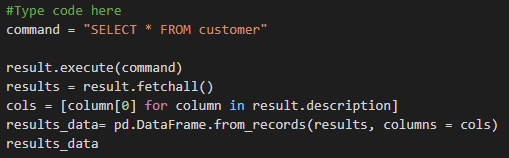

In [ ]:
#Type code here
command = "SELECT * FROM customer"

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
...,...,...,...,...,...,...,...,...,...
594,595,1,TERRENCE,GUNDERSON,TERRENCE.GUNDERSON@sakilacustomer.org,601,1,2006-02-14 22:04:37.000,2021-03-06 15:53:41
595,596,1,ENRIQUE,FORSYTHE,ENRIQUE.FORSYTHE@sakilacustomer.org,602,1,2006-02-14 22:04:37.000,2021-03-06 15:53:41
596,597,1,FREDDIE,DUGGAN,FREDDIE.DUGGAN@sakilacustomer.org,603,1,2006-02-14 22:04:37.000,2021-03-06 15:53:41
597,598,1,WADE,DELVALLE,WADE.DELVALLE@sakilacustomer.org,604,1,2006-02-14 22:04:37.000,2021-03-06 15:53:41


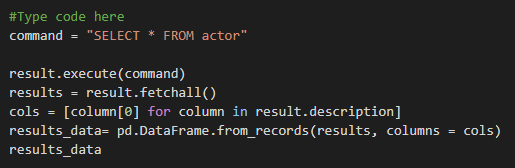

In [ ]:
#Type code here
command = "SELECT *FROM actor"

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2021-03-06 15:51:59
1,2,NICK,WAHLBERG,2021-03-06 15:51:59
2,3,ED,CHASE,2021-03-06 15:51:59
3,4,JENNIFER,DAVIS,2021-03-06 15:51:59
4,5,JOHNNY,LOLLOBRIGIDA,2021-03-06 15:51:59
...,...,...,...,...
195,196,BELA,WALKEN,2021-03-06 15:52:00
196,197,REESE,WEST,2021-03-06 15:52:00
197,198,MARY,KEITEL,2021-03-06 15:52:00
198,199,JULIA,FAWCETT,2021-03-06 15:52:00


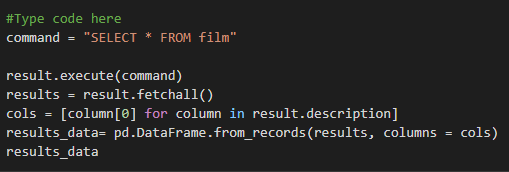

In [ ]:
#Type code here
command = "SELECT *FROM film"

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,None,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2021-03-06 15:52:08
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,None,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",2021-03-06 15:52:08
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,None,6,0.99,105,10.99,NC-17,Deleted Scenes,2021-03-06 15:52:08
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,None,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",2021-03-06 15:52:08


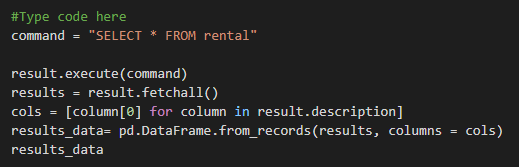

In [ ]:
#Type code here
command = "SELECT *FROM rental"

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30.000,367,130,2005-05-26 22:04:30.000,1,2021-03-06 15:53:41
1,2,2005-05-24 22:54:33.000,1525,459,2005-05-28 19:40:33.000,1,2021-03-06 15:53:41
2,3,2005-05-24 23:03:39.000,1711,408,2005-06-01 22:12:39.000,1,2021-03-06 15:53:41
3,4,2005-05-24 23:04:41.000,2452,333,2005-06-03 01:43:41.000,2,2021-03-06 15:53:41
4,5,2005-05-24 23:05:21.000,2079,222,2005-06-02 04:33:21.000,1,2021-03-06 15:53:41
...,...,...,...,...,...,...,...
16039,16045,2005-08-23 22:25:26.000,772,14,2005-08-25 23:54:26.000,1,2021-03-06 15:55:57
16040,16046,2005-08-23 22:26:47.000,4364,74,2005-08-27 18:02:47.000,2,2021-03-06 15:55:57
16041,16047,2005-08-23 22:42:48.000,2088,114,2005-08-25 02:48:48.000,2,2021-03-06 15:55:57
16042,16048,2005-08-23 22:43:07.000,2019,103,2005-08-31 21:33:07.000,1,2021-03-06 15:55:57


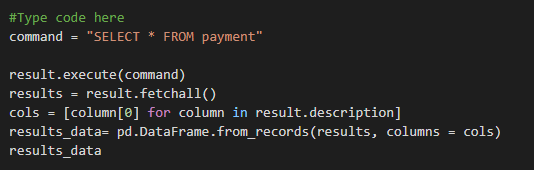

In [ ]:
#Type code here
command = "SELECT *FROM payment"

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76.0,2.99,2005-05-25 11:30:37.000,2021-03-06 15:55:57
1,2,1,1,573.0,0.99,2005-05-28 10:35:23.000,2021-03-06 15:55:57
2,3,1,1,1185.0,5.99,2005-06-15 00:54:12.000,2021-03-06 15:55:57
3,4,1,2,1422.0,0.99,2005-06-15 18:02:53.000,2021-03-06 15:55:57
4,5,1,2,1476.0,9.99,2005-06-15 21:08:46.000,2021-03-06 15:55:57
...,...,...,...,...,...,...,...
16044,16045,599,1,14599.0,4.99,2005-08-21 17:43:42.000,2021-03-06 15:58:08
16045,16046,599,1,14719.0,1.99,2005-08-21 21:41:57.000,2021-03-06 15:58:08
16046,16047,599,2,15590.0,8.99,2005-08-23 06:09:44.000,2021-03-06 15:58:09
16047,16048,599,2,15719.0,2.99,2005-08-23 11:08:46.000,2021-03-06 15:58:09


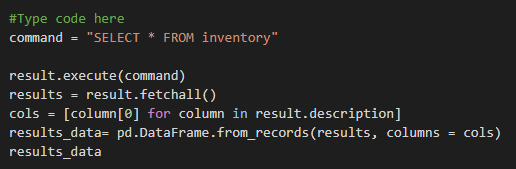

In [ ]:
#Type code here
command = "SELECT *FROM inventory"

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,inventory_id,film_id,store_id,last_update
0,1,1,1,2021-03-06 15:52:08
1,2,1,1,2021-03-06 15:52:08
2,3,1,1,2021-03-06 15:52:08
3,4,1,1,2021-03-06 15:52:08
4,5,1,2,2021-03-06 15:52:08
...,...,...,...,...
4576,4577,1000,1,2021-03-06 15:52:45
4577,4578,1000,2,2021-03-06 15:52:45
4578,4579,1000,2,2021-03-06 15:52:45
4579,4580,1000,2,2021-03-06 15:52:45


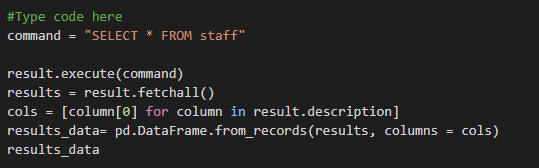

In [ ]:
#Type code here
command = "SELECT *FROM staff"

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,staff_id,first_name,last_name,address_id,picture,email,store_id,active,username,password,last_update
0,1,Mike,Hillyer,3,None,Mike.Hillyer@sakilastaff.com,1,1,Mike,8cb2237d0679ca88db6464eac60da96345513964,2021-03-06 15:52:00
1,2,Jon,Stephens,4,None,Jon.Stephens@sakilastaff.com,2,1,Jon,8cb2237d0679ca88db6464eac60da96345513964,2021-03-06 15:52:00


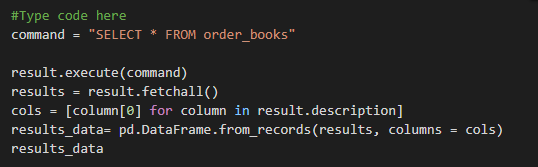

In [ ]:
#Type code here
command = "SELECT *FROM order_books"

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,order_id,order_num,order_amount,customer_id
0,1,2,5000.0,1
1,2,4,14000.0,2
2,3,3,7500.0,1
3,4,1,4000.0,7
4,5,5,7500.0,3
5,6,3,10500.0,4
6,7,2,5000.0,5
7,8,1,1000.0,6
8,9,1,2800.0,8
9,10,4,14800.0,8


# **JOIN OPERATION**

Join adalah cara untuk menghubungkan data yang diambil dari tabel-tabel melalui sebuah kolom yang menghubungkan mereka.​

# Mengapa join itu penting?​

Join memperbolehkan kita untuk mengambil data dari beberapa tabel melalui satu query. Join menghubungkan satu tabel dengan tabel yang lain (inilah yang dimaksud dengan relational dari istilah relational database).​


# **NATURAL JOIN**

NATURAL JOIN akan menggabungkan tabel dengan semua kolom yang sama nama.

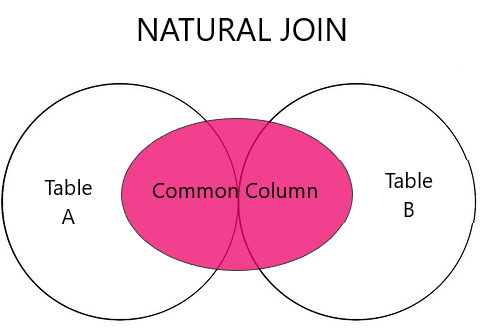

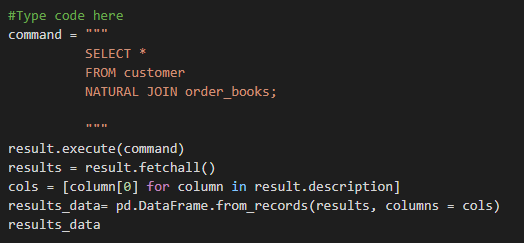

In [ ]:
#Type code here
command = """
          SELECT *
         FROM customer
         NATURAL JOIN order_books;

          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update,order_id,order_num,order_amount
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,1,2,5000.0
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,2,4,14000.0
2,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,3,3,7500.0
3,7,1,MARIA,MILLER,MARIA.MILLER@sakilacustomer.org,11,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,4,1,4000.0
4,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,5,5,7500.0
5,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,6,3,10500.0
6,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,7,2,5000.0
7,6,2,JENNIFER,DAVIS,JENNIFER.DAVIS@sakilacustomer.org,10,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,8,1,1000.0
8,8,2,SUSAN,WILSON,SUSAN.WILSON@sakilacustomer.org,12,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,9,1,2800.0
9,8,2,SUSAN,WILSON,SUSAN.WILSON@sakilacustomer.org,12,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,10,4,14800.0


# **CROSS JOIN**

CROSS JOIN memberikan produk Cartesian untuk kolom yang dipilih dari dua tabel yang digabungkan, dengan mencocokkan semua nilai dari tabel pertama dengan semua nilai dari tabel kedua.

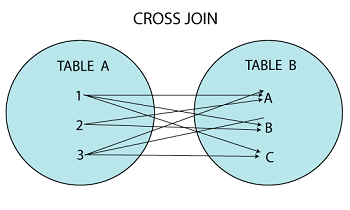

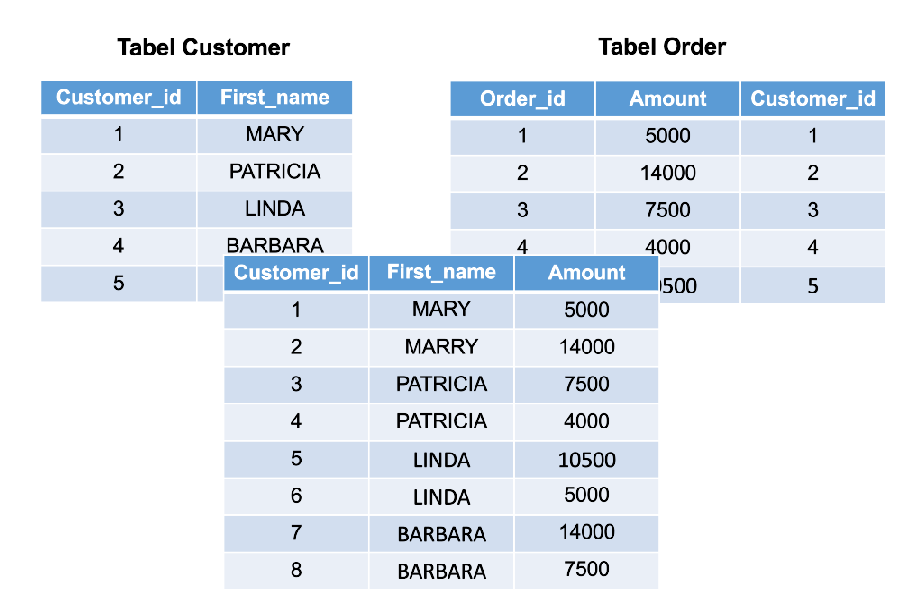

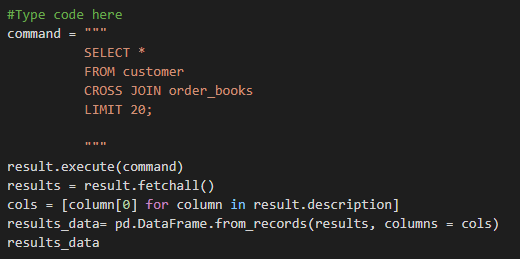

In [ ]:
#Type code here
command = """
          SELECT *
          FROM customer
          CROSS JOIN order_books
          LIMIT 20;
        
          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update,order_id,order_num,order_amount,customer_id
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,1,2,5000.0,1
1,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,2,4,14000.0,2
2,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,3,3,7500.0,1
3,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,4,1,4000.0,7
4,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,5,5,7500.0,3
5,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,6,3,10500.0,4
6,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,7,2,5000.0,5
7,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,8,1,1000.0,6
8,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,9,1,2800.0,8
9,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36,10,4,14800.0,8


# **INNER JOIN**

JOIN (atau secara eksplisit INNER JOIN) mengembalikan baris yang memiliki nilai yang cocok di satu atau dua tabel yang memenuhi syarat.

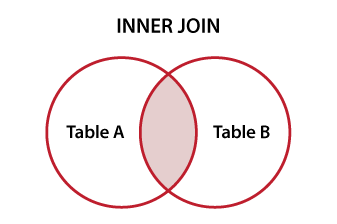

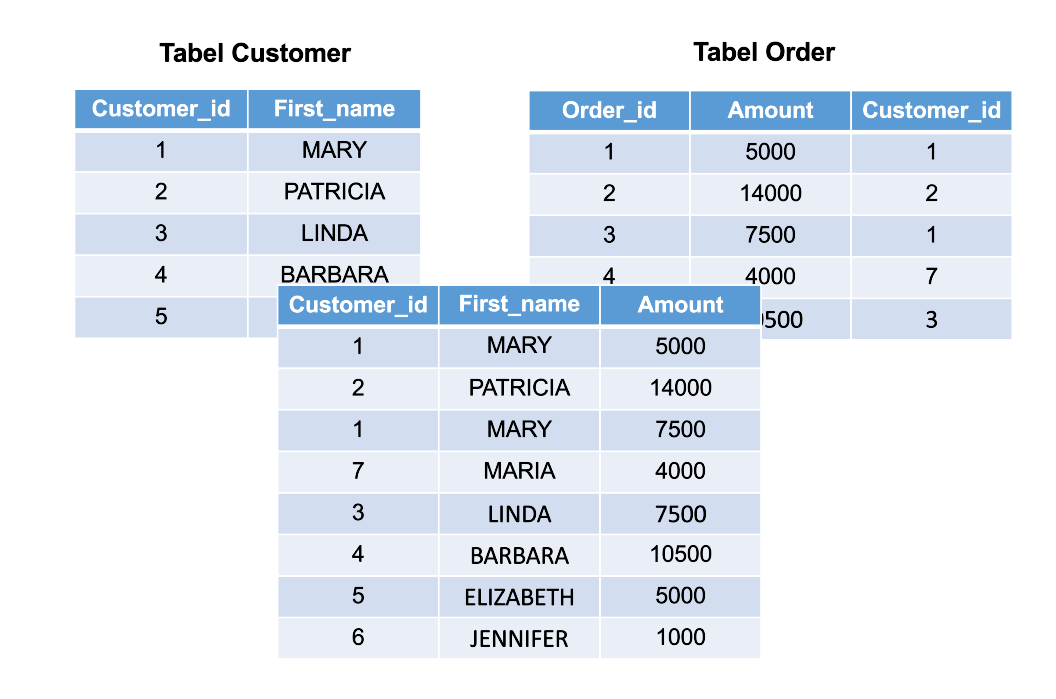

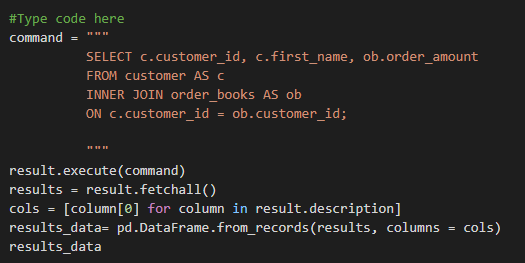

In [ ]:
#Type code here
command = """
          SELECT c.customer_id, c.first_name, ob.order_amount
          FROM customer AS c
          INNER JOIN order_books AS ob
          ON c.customer_id = ob.customer_id;
          
          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,customer_id,first_name,order_amount
0,1,MARY,5000.0
1,2,PATRICIA,14000.0
2,1,MARY,7500.0
3,7,MARIA,4000.0
4,3,LINDA,7500.0
5,4,BARBARA,10500.0
6,5,ELIZABETH,5000.0
7,6,JENNIFER,1000.0
8,8,SUSAN,2800.0
9,8,SUSAN,14800.0


# **LEFT JOIN**

LEFT JOIN mengembalikan baris yang cocok dari kedua tabel bersama dengan baris yang tidak cocok dari tabel kiri. Jika catatan dari tabel kiri tidak memiliki baris yang cocok di tabel kanan, ini akan menampilkan catatan dengan nilai NULL.

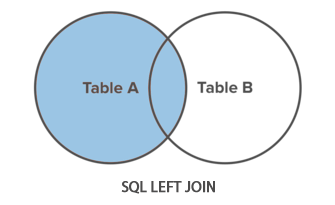

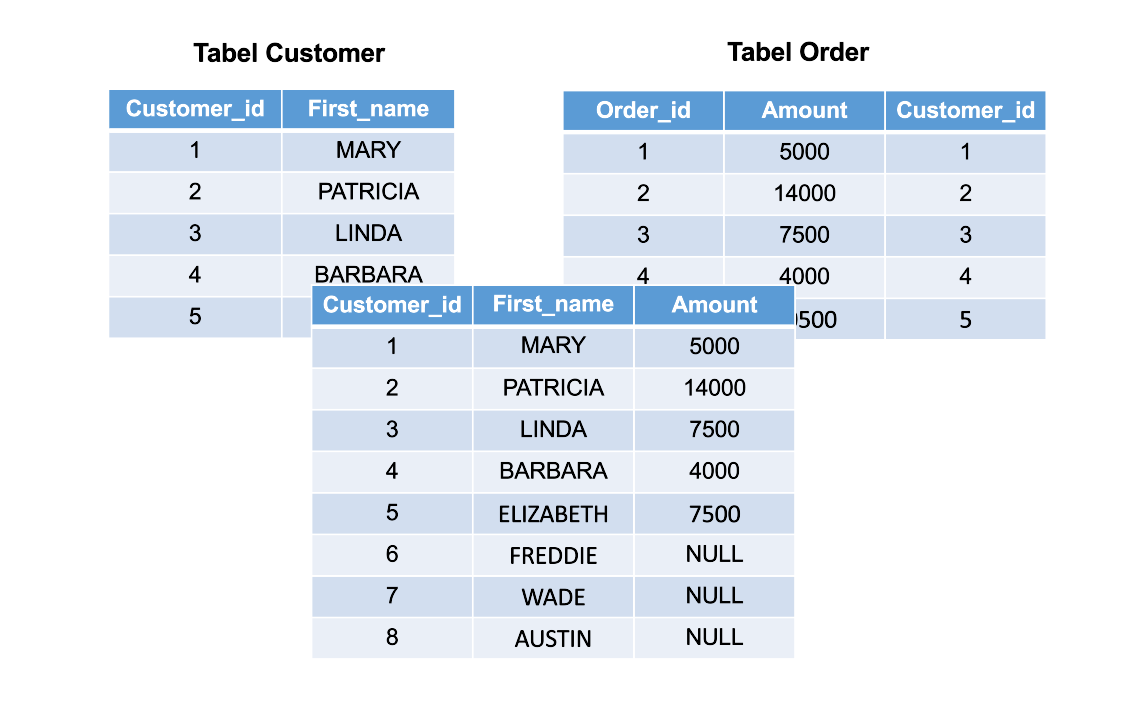

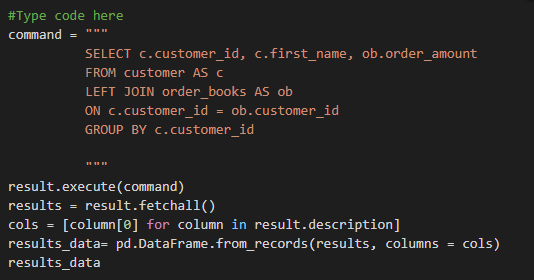

In [ ]:
#Type code here
command = """
          SELECT c.customer_id, c.first_name, ob.order_amount
          FROM customer AS c
          LEFT JOIN order_books AS ob
          ON c.customer_id = ob.customer_id
          GROUP BY c.customer_id 
        
          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,customer_id,first_name,order_amount
0,1,MARY,7500.0
1,2,PATRICIA,14000.0
2,3,LINDA,7500.0
3,4,BARBARA,10500.0
4,5,ELIZABETH,5000.0
...,...,...,...
594,595,TERRENCE,NaN
595,596,ENRIQUE,NaN
596,597,FREDDIE,NaN
597,598,WADE,NaN


# **RIGHT JOIN**

Mengembalikan baris yang cocok dari kedua tabel bersama dengan baris yang tidak cocok dari tabel kanan. Jika catatan dari tabel kanan tidak memiliki baris yang cocok di tabel kiri, ini akan menampilkan catatan dengan nilai NULL.



**NOTE :** Sayangnya, SQLite tidak mendukung klausa RIGHT JOIN dan juga klausa FULL OUTER JOIN. Namun, Anda dapat dengan mudah meniru FULL OUTER JOIN dengan menggunakan klausa LEFT JOIN.

# **AGGREGATION - (SUM, COUNT, MIN, MAX, AVG)**

Mengelompokkan baris yang memiliki nilai yang sama dalam kolom yang ditentukan.Ini menghitung ringkasan (Agregat) untuk setiap kombinasi nilai yang unik.
<br>
<br>

<table>
  <tr>
    <th>Nama
    <th>Deskripsi
  </tr>
  <tr>
    <td> AVG
    <td> Nilai rata-rata untuk baris dalam grup​
  </tr>
  <tr>
    <td> COUNT
    <td> Jumlah nilai untuk baris dalam grup​
  </tr>
  <tr>
    <td> MAX
    <td> Nilai maksimum dalam grup​
  </tr>
  <tr>
    <td> MIN
    <td> Nilai minimum dalam grup
  </tr>
  <tr>
    <td> SUM
    <td> Jumlah nilai dalam group​
  </tr>
</table>

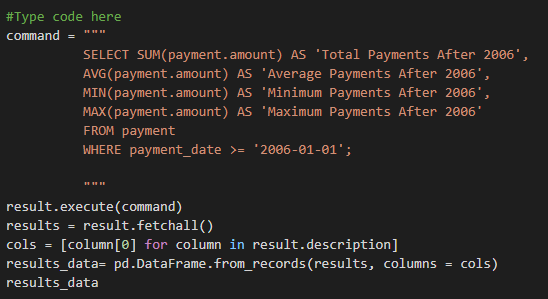

In [ ]:
#Type code here
command = """
          SELECT SUM(payment.amount) AS 'Total Payments After 2006',
          AVG(payment.amount) AS 'Average Payments After 2006',
          MIN(payment.amount) AS 'Minimum Payments After 2006',
          MAX(payment.amount) AS 'Maximum Payments After 2006'
          FROM payment
          WHERE payment_date >= '2006-01-01';
          
          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,Total Payments After 2006,Average Payments After 2006,Minimum Payments After 2006,Maximum Payments After 2006
0,514.18,2.825165,0,9.98


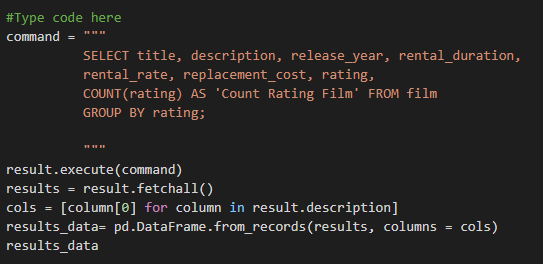

In [ ]:
#Type code here
command = """
          SELECT title, description, release_year, rental_duration,
          rental_rate, replacement_cost, rating,
          COUNT(rating) AS 'Count Rating Film' FROM film
          GROUP BY rating;
          

          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,title,description,release_year,rental_duration,rental_rate,replacement_cost,rating,Count Rating Film
0,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,6,0.99,9.99,G,178
1,ZORRO ARK,A Intrepid Panorama of a Mad Scientist And a B...,2006,3,4.99,18.99,NC-17,210
2,WORST BANGER,A Thrilling Drama of a Madman And a Dentist wh...,2006,4,2.99,26.99,PG,194
3,WYOMING STORM,A Awe-Inspiring Panorama of a Robot And a Boat...,2006,6,4.99,29.99,PG-13,223
4,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,5,2.99,28.99,R,195


# **SET OPERATION - UNION**

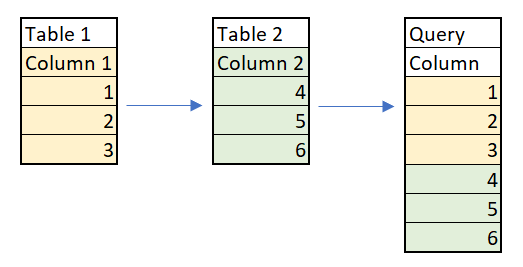

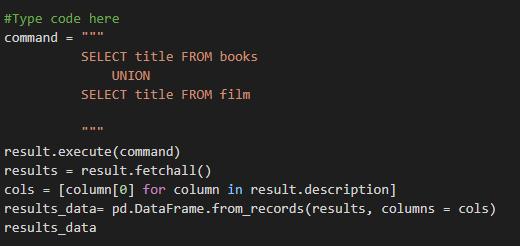

In [ ]:
#Type code here
command = """
          SELECT title FROM books
              UNION 
          SELECT title FROM film

          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,title
0,ACADEMY DINOSAUR
1,ACE GOLDFINGER
2,ADAPTATION HOLES
3,AFFAIR PREJUDICE
4,AFRICAN EGG
...,...
1001,YOUNG LANGUAGE
1002,YOUTH KICK
1003,ZHIVAGO CORE
1004,ZOOLANDER FICTION


# **SET OPERATION - INTERSECT**

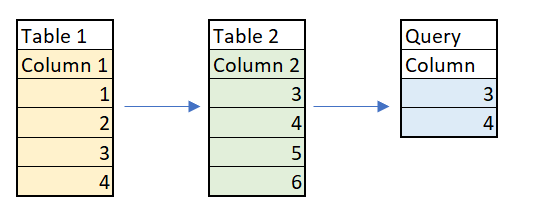



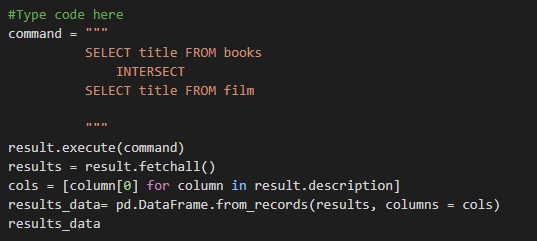

In [ ]:
#Type code here
command = """
          SELECT title FROM books
            INTERSECT 
          SELECT title FROM film
        
          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,title
0,ALONE TRIP
1,BEACH HEARTBREAKERS
2,WHISPERER GIANT
3,YOUNG LANGUAGE


# **SET OPERATION - EXCEPT**

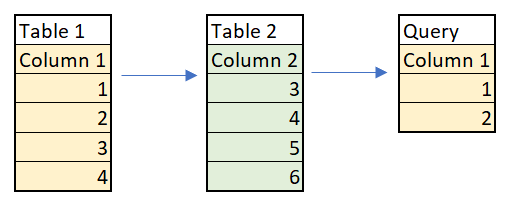

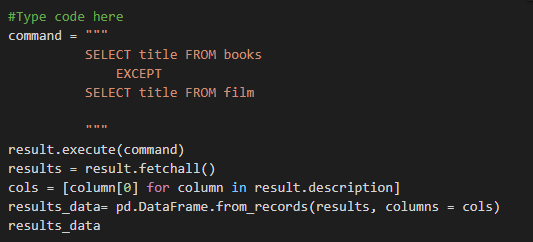

In [ ]:
#Type code here
command = """
          SELECT title FROM books
            EXCEPT
          SELECT title FROM film
          

          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,title
0,Applied AI
1,Big Data Pipeline
2,Intro to Data Science
3,Lovely Love
4,My Last Book
5,Time to Grow Up!


# **COMPLEX QUERY JOIN**

1. Gunakan JOIN untuk menampilkan nama depan dan belakang, serta alamat, setiap anggota staf. Gunakan tabel staff dan tabel address.

In [ ]:
#Type code here
command = """
          SELECT s.first_name AS 'First Name', s.last_name AS 'Last Name', 
          a.address AS 'Address'
          FROM staff AS s
          INNER JOIN address AS a 
          ON a.address_id = s.address_id;
          
          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,First Name,Last Name,Address
0,Mike,Hillyer,23 Workhaven Lane
1,Jon,Stephens,1411 Lillydale Drive


2. Gunakan JOIN untuk menampilkan jumlah total  setiap anggota staf pada bulan Agustus 2005. Gunakan tabel staff dan tabel payment.

In [ ]:
#Type code here
command = """
          SELECT s.first_name || ' ' ||  s.last_name as 'Staff Member', 
          sum(p.amount) as 'Total Amount'
          FROM payment as p
          INNER JOIN staff as s
          ON p.staff_id = s.staff_id
          WHERE payment_date like '2005-08%'
          GROUP BY p.staff_id;

          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,Staff Member,Total Amount
0,Mike Hillyer,11853.65
1,Jon Stephens,12218.48


3. Gunakan JOIN untuk menampilkan film yang paling sering disewa dalam urutan menurun. Gunakan tabel film, tabel inventory, dan tabel rental.

In [ ]:
#Type code here
command = """
          SELECT f.title AS 'Movie', count(r.rental_date) AS 'Times Rented'
          FROM film AS f
          INNER JOIN inventory AS i ON i.film_id = f.film_id
          INNER JOIN rental AS r ON r.inventory_id = i.inventory_id
          GROUP BY f.title
          ORDER BY count(r.rental_date) desc;

          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,Movie,Times Rented
0,BUCKET BROTHERHOOD,34
1,ROCKETEER MOTHER,33
2,FORWARD TEMPLE,32
3,GRIT CLOCKWORK,32
4,JUGGLER HARDLY,32
...,...,...
953,SEVEN SWARM,5
954,TRAFFIC HOBBIT,5
955,HARDLY ROBBERS,4
956,MIXED DOORS,4


4.  Gunakan JOIN untuk mengidentifikasi semua film yang dikategorikan sebagai film Action menggunakan tabel film, tabel film_category, dan tabel category.

In [ ]:
#Type code here
command = """
           SELECT f.title AS 'Movie Title', c.name AS 'Category Movie'
           FROM film as f
           LEFT JOIN film_category as fc on fc.film_id = f.film_id
           LEFT JOIN category as c on c.category_id = fc.category_id
           WHERE c.name = 'Action';

          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,Movie Title,Category Movie
0,AMADEUS HOLY,Action
1,AMERICAN CIRCUS,Action
2,ANTITRUST TOMATOES,Action
3,ARK RIDGEMONT,Action
4,BAREFOOT MANCHURIAN,Action
...,...,...
59,UPRISING UPTOWN,Action
60,WATERFRONT DELIVERANCE,Action
61,WEREWOLF LOLA,Action
62,WOMEN DORADO,Action


5. Gunakan JOIN unutk mengidentifikasi nama-nama aktor yang bermain film dengan judul yang terdapat huruf S dan R.

In [ ]:
#Type code here
command = """
            SELECT f.film_id AS 'Film ID', f.title AS 'Title', 
            f.description AS 'Description', f.release_year AS 'Release Year',
            a.first_name || ' ' || a.last_name AS 'Actor Name'
            FROM film AS f
            LEFT JOIN film_actor AS fa 
            ON fa.film_id = f.film_id
            LEFT JOIN actor AS a
            ON fa.actor_id = a.actor_id
            WHERE f.title like 'S%' or 'R%' 
            LIMIT 10

          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,Film ID,Title,Description,Release Year,Actor Name
0,755,SABRINA MIDNIGHT,A Emotional Story of a Squirrel And a Crocodil...,2006,KEVIN BLOOM
1,755,SABRINA MIDNIGHT,A Emotional Story of a Squirrel And a Crocodil...,2006,CHRISTIAN AKROYD
2,755,SABRINA MIDNIGHT,A Emotional Story of a Squirrel And a Crocodil...,2006,MEG HAWKE
3,755,SABRINA MIDNIGHT,A Emotional Story of a Squirrel And a Crocodil...,2006,CHRIS DEPP
4,756,SADDLE ANTITRUST,A Stunning Epistle of a Feminist And a A Shark...,2006,BOB FAWCETT
5,756,SADDLE ANTITRUST,A Stunning Epistle of a Feminist And a A Shark...,2006,ADAM HOPPER
6,756,SADDLE ANTITRUST,A Stunning Epistle of a Feminist And a A Shark...,2006,MINNIE KILMER
7,757,SAGEBRUSH CLUELESS,A Insightful Story of a Lumberjack And a Hunte...,2006,LUCILLE TRACY
8,757,SAGEBRUSH CLUELESS,A Insightful Story of a Lumberjack And a Hunte...,2006,FRANCES DAY-LEWIS
9,757,SAGEBRUSH CLUELESS,A Insightful Story of a Lumberjack And a Hunte...,2006,SEAN WILLIAMS


# **ASSIGNMENT**

Jawablah pertanyaan-pertanyaan berikut dengan SQL.
1. Tampilkan 10 daftar setiap film dan jumlah aktor yang terdaftar untuk film itu. Gunakan tabel film_actor dan film serta perintah JOIN (contoh: Inner Join dan Left Join).

<br>
Hint: (COUNT, klausa ON, GROUP BY, LIMIT, dan penggunaan JOIN) 

Output dari Nomor 1:
<br>
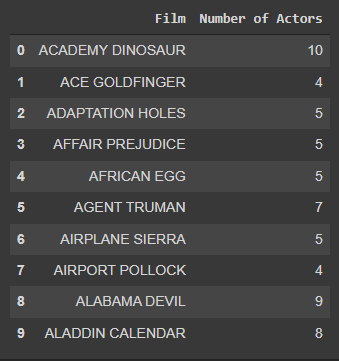

<br>

2. Tampilkan 10 film yang dikategorikan sebagai film Horor menggunakan tabel film, tabel film_category, dan tabel category serta perintah JOIN (contoh: Inner Join dan Left Join).

<br>
Hint: (klausa ON, klausa WHERE, Operator Perbandingan, LIMIT, dan penggunaan JOIN) 

Ouput dari Nomor 2:
<br>
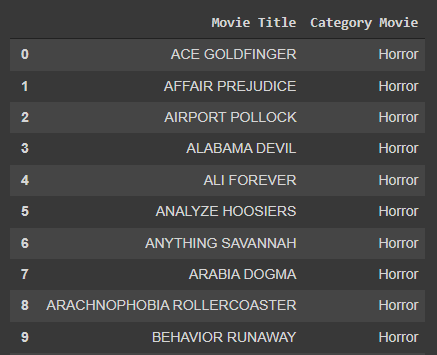

<br>

3. Menggunakan tabel payment dan customer serta perintah JOIN (contoh: Inner Join dan Left Join), buat daftar total yang dibayarkan oleh 10 pelanggan.

<br>
Hint: (SUM, klausa ON, Operator Perbandingan, GROUP BY, LIMIT, dan penggunaan JOIN)

Output dari Nomor 3:
<br>
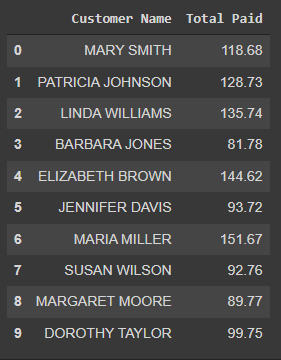

<br>

4. Tampilkan 10 judul film yang dimulai dengan huruf K atau Q yang bahasanya bahasa Inggris. Gunakan tabel film dan tabel language serta perintah JOIN (contoh: Inner Join dan Left Join).

<br>
Hint: (klausa ON, Operator Perbandingan, klausa WHERE, Operator Boolean, LIMIT, dan penggunaan JOIN)

Output dari Nomor 4:
<br>
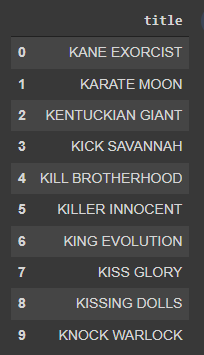

<br>

5. Tampilkan hasil penjumlahan, jumlah minimum, jumlah maximum, dan jumlah dari rata-rata pembayaran sebelum tahun 2006. Gunakan tabel payments.

Output dari Nomor 5:
<br>
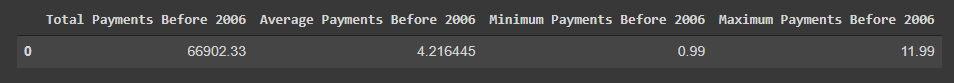


In [ ]:
# 1. Tampilkan 10 daftar setiap film dan jumlah aktor yang terdaftar untuk film itu. Gunakan tabel film_actor dan film serta perintah JOIN (contoh: Inner Join dan Left Join).

command = """
          SELECT f.title as 'film', COUNT(fa.actor_id) as 'Numbers of Actors'
          FROM film as f
          INNER JOIN film_actor as fa
          ON f.film_id = fa.film_id
          GROUP BY f.title
          LIMIT 10;
          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,film,Numbers of Actors
0,ACADEMY DINOSAUR,10
1,ACE GOLDFINGER,4
2,ADAPTATION HOLES,5
3,AFFAIR PREJUDICE,5
4,AFRICAN EGG,5
5,AGENT TRUMAN,7
6,AIRPLANE SIERRA,5
7,AIRPORT POLLOCK,4
8,ALABAMA DEVIL,9
9,ALADDIN CALENDAR,8


In [ ]:
# 2. Tampilkan 10 film yang dikategorikan sebagai film Horor menggunakan tabel film, tabel film_category, dan tabel category serta perintah JOIN (contoh: Inner Join dan Left Join)

command = """
           SELECT f.title AS 'Movie Title', c.name AS 'Category Movie'
           FROM film as f
           LEFT JOIN film_category as fc on fc.film_id = f.film_id
           LEFT JOIN category as c on c.category_id = fc.category_id
           WHERE c.name = 'Horror'
           LIMIT 10;

          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,Movie Title,Category Movie
0,ACE GOLDFINGER,Horror
1,AFFAIR PREJUDICE,Horror
2,AIRPORT POLLOCK,Horror
3,ALABAMA DEVIL,Horror
4,ALI FOREVER,Horror
5,ANALYZE HOOSIERS,Horror
6,ANYTHING SAVANNAH,Horror
7,ARABIA DOGMA,Horror
8,ARACHNOPHOBIA ROLLERCOASTER,Horror
9,BEHAVIOR RUNAWAY,Horror


In [ ]:
# 3. Menggunakan tabel payment dan customer serta perintah JOIN (contoh: Inner Join dan Left Join), buat daftar total yang dibayarkan oleh 10 pelanggan.

command = """
          SELECT s.first_name || ' ' ||  s.last_name as 'Customer Name', 
          sum(p.amount) as 'Total Paid'
          FROM payment as p
          INNER JOIN customer as s
          ON p.customer_id = s.customer_id
          GROUP BY p.customer_id
          LIMIT 10;

          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,Customer Name,Total Paid
0,MARY SMITH,118.68
1,PATRICIA JOHNSON,128.73
2,LINDA WILLIAMS,135.74
3,BARBARA JONES,81.78
4,ELIZABETH BROWN,144.62
5,JENNIFER DAVIS,93.72
6,MARIA MILLER,151.67
7,SUSAN WILSON,92.76
8,MARGARET MOORE,89.77
9,DOROTHY TAYLOR,99.75


In [ ]:
# 4.Tampilkan 10 judul film yang dimulai dengan huruf K dan Q yang bahasanya bahasa Inggris. Gunakan tabel film dan tabel language serta perintah JOIN (contoh: Inner Join dan Left Join)

command = """
            SELECT f.title AS 'Title'
            FROM film AS f
            INNER JOIN language AS fa 
            ON fa.language_id = f.language_id
            INNER JOIN language AS a
            ON fa.language_id = a.language_id
            WHERE f.title like 'K%' 
            LIMIT 10

          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,Title
0,KANE EXORCIST
1,KARATE MOON
2,KENTUCKIAN GIANT
3,KICK SAVANNAH
4,KILL BROTHERHOOD
5,KILLER INNOCENT
6,KING EVOLUTION
7,KISS GLORY
8,KISSING DOLLS
9,KNOCK WARLOCK


In [ ]:
# 5. Tampilkan hasil penjumlahan, jumlah minimum, jumlah maximum, dan jumlah dari rata-rata pembayaran sebelum tahun 2006. Gunakan tabel payments.

command = """
          SELECT SUM(payment.amount) AS 'Total Payments Before 2006',
          AVG(payment.amount) AS 'Average Payments Before 2006',
          MIN(payment.amount) AS 'Average Payments Before 2006',
          MAX(payment.amount) AS 'Average Payments Before 2006'
          FROM payment
          WHERE payment_date <= '2006-01-01';
          
          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,Total Payments Before 2006,Average Payments Before 2006,Average Payments Before 2006,Average Payments Before 2006
0,66902.33,4.216445,0.99,11.99
